#Business Case: Delhivery - Feature Engineering

**Dataset Link:** [delhivery_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181)

**Column Profiling:**

- data - tells whether the data is testing or training data
- trip_creation_time – Timestamp of trip creation
- route_schedule_uuid – Unique Id for a particular route schedule
- route_type – Transportation type
    - FTL – Full Truck Load: FTL shipments get to the destination sooner, as the - truck is making no other pickups or drop-offs along the way
    - Carting: Handling system consisting of small vehicles (carts)
- trip_uuid - Unique ID given to a particular trip (A trip may include - different source and destination centers)
- source_center - Source ID of trip origin
- source_name - Source Name of trip origin
- destination_cente – Destination ID
- destination_name – Destination Name
- od_start_time – Trip start time
- od_end_time – Trip end time
- start_scan_to_end_scan – Time taken to deliver from source to destination (min)
- is_cutoff – Unknown field
- cutoff_factor – Unknown field
- cutoff_timestamp – Unknown field
- actual_distance_to_destination – Distance in Kms between source and destination warehouse
- actual_time – Actual time taken to complete the delivery (Cumulative)
- osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- osrm_distance – An open-source routing engine which computes the - shortest - path between points in a given map (Includes usual traffic, - distance - through major and minor roads) (Cumulative)
- factor – Unknown field
- segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
- segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
- segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
- segment_factor – Unknown field

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Scaler work/delhivery_data.csv",
                    parse_dates=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp'])
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,45,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,54,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,63,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,True,72,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# Missing Value Analysis

In [ ]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
df[df['source_name'].isna()].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,22,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,44,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,66,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,88,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,True,110,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556


In [ ]:
# Missing Center Names. The NaN values are not sensory errors
src_miss_cntr = df[df['source_name'].isna()]['source_center'].unique()
for center in src_miss_cntr:
    print(center, len(df[(df['source_center']==center) & (~df['source_name'].isna())]))
print()
dst_miss_cntr = df[df['destination_name'].isna()]['destination_center'].unique()
for center in dst_miss_cntr:
    print(center, len(df[(df['destination_center']==center) & (~df['destination_name'].isna())]))

IND342902A1B 0
IND577116AAA 0
IND282002AAD 0
IND465333A1B 0
IND841301AAC 0
IND509103AAC 0
IND126116AAA 0
IND331022A1B 0
IND505326AAB 0
IND852118A1B 0

IND342902A1B 0
IND577116AAA 0
IND282002AAD 0
IND465333A1B 0
IND841301AAC 0
IND505326AAB 0
IND852118A1B 0
IND126116AAA 0
IND509103AAC 0
IND221005A1A 0
IND250002AAC 0
IND331001A1C 0
IND122015AAC 0


In [ ]:
# Getting the most visited destination from source -- Kaha se zyada chize jati h ek source se
src_dst = df.groupby(['source_center', 'destination_center'])['data'].count().reset_index() #Group by
src_dst.columns = ['source_center', 'destination_center', 'count']
src_dst['rank'] = src_dst.groupby(['source_center'])['count'].rank(ascending=False, method='dense') #rank - get the most src-dst combination
src_dst = src_dst[src_dst['rank']==1]

for center in src_miss_cntr:
    print(center, src_dst[src_dst['source_center']==center]['destination_center'].iloc[0])

IND342902A1B IND302014AAA
IND577116AAA IND577101AAA
IND282002AAD IND474003AAA
IND465333A1B IND462022AAA
IND841301AAC IND841226AAB
IND509103AAC IND518002AAA
IND126116AAA IND131301AAA
IND331022A1B IND331001A1C
IND505326AAB IND505327AAA
IND852118A1B IND854326AAB


In [ ]:
# Getting the most visits to destination from source -- Kaha se zyada chize aati h ek desination pe
dst_src = df.groupby(['source_center', 'destination_center'])['data'].count().reset_index() #Group by
dst_src.columns = ['source_center', 'destination_center', 'count']
dst_src['rank'] = dst_src.groupby(['destination_center'])['count'].rank(ascending=False, method='dense') #rank - get the most src-dst combination
dst_src = dst_src[dst_src['rank']==1]

for center in dst_miss_cntr:
    print(center, dst_src[dst_src['destination_center']==center]['source_center'].iloc[0])

IND342902A1B IND342601AAA
IND577116AAA IND573103AAA
IND282002AAD IND000000ACB
IND465333A1B IND465001AAA
IND841301AAC IND841405AAA
IND505326AAB IND505302AAB
IND852118A1B IND854334AAA
IND126116AAA IND126102AAA
IND509103AAC IND509124AAA
IND221005A1A IND221010AAA
IND250002AAC IND110037AAM
IND331001A1C IND331022A1B
IND122015AAC IND000000ACB


# Grouping and Feature Engineering

In [ ]:
temp_df = df[df['trip_uuid']=='trip-153671041653548748']
temp_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
124981,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,22,2018-09-12 14:56:29,22.812439,43.0,39.0,55.2597,1.102564,43.0,39.0,55.2597,1.102564
124982,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,44,2018-09-12 14:30:33,45.902553,69.0,35.0,49.4845,1.971429,25.0,52.0,73.8647,0.480769
124983,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,66,2018-09-12 13:14:28,68.090371,146.0,51.0,72.5479,2.862745,76.0,16.0,23.0634,4.750000
124984,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,88,2018-09-12 12:38:29,88.382207,181.0,66.0,93.9641,2.742424,35.0,15.0,21.4162,2.333333
124985,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,110,2018-09-12 12:14:30,110.168313,205.0,82.0,117.2332,2.500000,23.0,16.0,23.2691,1.437500
124986,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,132,2018-09-12 11:46:27,133.062129,234.0,99.0,141.1550,2.363636,28.0,16.0,23.9218,1.750000
124987,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,154,2018-09-12 11:24:24,154.393443,256.0,116.0,164.9134,2.206897,22.0,16.0,23.7584,1.375000
124988,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,176,2018-09-12 10:54:26,177.997213,286.0,134.0,190.8280,2.134328,29.0,18.0,25.9146,1.611111
124989,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,198,2018-09-12 10:22:24,199.007702,318.0,153.0,216.2362,2.078431,32.0,18.0,25.4082,1.777778
124990,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,True,220,2

In [ ]:
def cg_total_trip_dist(group):
    ''' Compute the Total Distance of the Trip '''
    return group.groupby("source_center").agg(src_dst_dist=('osrm_time', 'last')).sum()
temp_df.groupby("trip_uuid").apply(cg_total_trip_dist, include_groups=False)

,src_dst_dist
trip_uuid,
trip-153671041653548748,717.0


In [ ]:
trip_df = df.groupby("trip_uuid").agg(
    data = ('data', lambda x: x.mode().iloc[0] if not x.mode().empty else None), #most occurence
    trip_start_time = ('trip_creation_time', 'min'), #min value
    route_schedule_uuid = ('route_schedule_uuid', lambda x: x.mode().iloc[0] if not x.mode().empty else None), #most occurence
    route_type = ('route_type', lambda x: x.mode().iloc[0] if not x.mode().empty else None), #most occurence
    trip_scr_cntr = ('source_center', 'first'), #first occurence
    trip_scr_cntr_n = ('source_name', 'first'),
    trip_dest_cntr = ('destination_center', 'last'), #last occurence
    trip_dest_cntr_n = ('destination_name', 'last'),
    trip_first_cntr_start = ('od_start_time', 'min'),
    trip_last_cntr_end = ('od_end_time', 'max'),
    num_of_cntr = ('source_center', 'nunique'), # Unique Count
    num_of_segments = ('source_center', 'nunique'), # Unique Count
    avg_cntr_delivery_time = ('start_scan_to_end_scan', lambda x: x.drop_duplicates().mean()), # Avg of unique values
    # total_trip_distance = ('actual_distance_to_destination': 'sum'), # NOT POSSIBLE TO COMPUTE HERE (require mulitple columns)
    total_trip_time = ('segment_actual_time', 'sum'),
    avg_segment_delivery_time = ('segment_actual_time', 'mean')
)
trip_df.reset_index(inplace=True)
def cg_cum_sum_dist(group):
    ''' Compute the Total Distance of the Trip '''
    return group.groupby("source_center").agg(src_dst_dist=('actual_distance_to_destination', 'last')).sum()
def cg_cum_sum_time(group):
    return group.groupby("source_center").agg(src_dst_dist=('osrm_time', 'last')).sum()
def cg_segment_ontime(group):
    ''' Compute if the segment was delivered ontime or not Compare to 'OSRM' Time '''
    times = group['segment_osrm_time'] - group['segment_actual_time']
    return pd.Series({
        'segment_ontime_miss': len(times[times < 0]),
        'segment_ontime_successed': len(times[times >= 0])
    })
def cg_segment_ondist(group):
    ''' Compute if the segment was delivered in the shortest distance or not Compare to 'OSRM' Distance '''
    actual_distance_to_destination = group['actual_distance_to_destination'] #cum_sum time
    segment_dist = []
    for i, x in enumerate(actual_distance_to_destination):
        if i==0:
            segment_dist.append(x)
        else:
            segment_dist.append(x-actual_distance_to_destination.iloc[i-1])
    distances = group['segment_osrm_distance'] - segment_dist
    return pd.Series({
        'segment_ondist_miss': len(distances[distances < 0]),
        'segment_ondist_successed': len(distances[distances >= 0])
    })
cg_cntr_dist = df.groupby("trip_uuid").apply(cg_cum_sum_dist, include_groups=False)
cg_cntr_dist = cg_cntr_dist.reset_index()
cg_cntr_dist.columns = ['trip_uuid', 'total_trip_distance']
cg_cntr_time = df.groupby("trip_uuid").apply(cg_cum_sum_time, include_groups=False)
cg_cntr_time = cg_cntr_time.reset_index()
cg_cntr_time.columns = ['trip_uuid', 'Exp_trip_time']

segment_ontime = df.groupby("trip_uuid").apply(cg_segment_ontime, include_groups=False)
segment_ondist = df.groupby("trip_uuid").apply(cg_segment_ondist, include_groups=False)

trip_df = trip_df.merge(cg_cntr_dist, on='trip_uuid', how='left')
trip_df = trip_df.merge(cg_cntr_time, on='trip_uuid', how='left')
trip_df = trip_df.merge(segment_ontime, on='trip_uuid', how='left')
trip_df = trip_df.merge(segment_ondist, on='trip_uuid', how='left')
trip_df.head()

,trip_uuid,data,trip_start_time,route_schedule_uuid,route_type,trip_scr_cntr,trip_scr_cntr_n,trip_dest_cntr,trip_dest_cntr_n,trip_first_cntr_start,trip_last_cntr_end,num_of_cntr,num_of_segments,avg_cntr_delivery_time,total_trip_time,avg_segment_delivery_time,total_trip_distance,Exp_trip_time,segment_ontime_miss,segment_ontime_successed,segment_ondist_miss,segment_ondist_successed
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2,2,1129.5,1548.0,39.692308,824.732854,717.0,34,5,0,39
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,2,2,90.0,141.0,15.666667,73.186911,68.0,9,0,0,9
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,2,2,1966.5,3308.0,37.168539,1927.404273,1740.0,83,6,0,89
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1,1,100.0,59.0,29.500000,17.175274,15.0,2,0,0,2
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,3,3,239.0,340.0,48.571429,127.448500,117.0,7,0,0,7


### Date Features

In [ ]:
# Extracting features from the datetime column
trip_df['year'] = trip_df['trip_start_time'].dt.year
trip_df['month'] = trip_df['trip_start_time'].dt.month
trip_df['day_of_week'] = trip_df['trip_start_time'].dt.dayofweek
trip_df['week_of_year'] = trip_df['trip_start_time'].dt.isocalendar().week
trip_df['quarter'] = trip_df['trip_start_time'].dt.quarter
trip_df['quarter-year'] = 'Q' + trip_df['trip_start_time'].dt.quarter.astype(str) + '-' + trip_df['trip_start_time'].dt.year.astype(str)
trip_df['month-year'] = trip_df['trip_start_time'].dt.to_period('M')

### Place features

In [ ]:
def extract_features(location):
    # Initialize variables
    city, place, code, state = None, None, None, None

    try:
        # Split on the opening parenthesis to separate state
        place_code_part, state = location.split('(')
        state = state.replace(')', '').strip()  # Clean up state

        # Further split the place_code_part
        place_code_split = place_code_part.strip().split('_')
        if len(place_code_split) < 2:
            place_code_split = place_code_part.strip().split(' ')

        # Assign city, place, and code based on the split parts
        city = place_code_split[0] if len(place_code_split) > 0 else None
        place = place_code_split[1] if len(place_code_split) > 1 else None
        code = place_code_split[2] if len(place_code_split) > 2 else None

        if len(place) <= 2:
            code = place
            place = None

    except Exception as e:
        # Handle any errors, set to None
        return pd.Series([None, None, None, None])

    return pd.Series([city, place, code, state])

# Apply the function to create separate columns
# temp_df = trip_df[trip_df['trip_uuid']=='trip-153671046011330457']
trip_df[['src_City', 'src_Place', 'src_Code', 'src_State']] = trip_df['trip_scr_cntr_n'].apply(extract_features)
trip_df[['dest_City', 'dest_Place', 'dest_Code', 'dest_State']] = trip_df['trip_dest_cntr_n'].apply(extract_features)

## Additional Features

In [ ]:
trip_df['Corridor'] = trip_df['trip_scr_cntr'] + '-' + trip_df['trip_dest_cntr']
trip_df['City-Corridor'] = trip_df['src_City'] + '-' + trip_df['dest_City']
trip_df['State-Corridor'] = trip_df['src_State'] + '-' + trip_df['dest_State']
trip_df.head()

,trip_uuid,data,trip_start_time,route_schedule_uuid,route_type,trip_scr_cntr,trip_scr_cntr_n,trip_dest_cntr,trip_dest_cntr_n,trip_first_cntr_start,trip_last_cntr_end,num_of_cntr,num_of_segments,avg_cntr_delivery_time,total_trip_time,avg_segment_delivery_time,total_trip_distance,Exp_trip_time,segment_ontime_miss,segment_ontime_successed,segment_ondist_miss,segment_ondist_successed,year,month,day_of_week,week_of_year,quarter,quarter-year,month-year,src_City,src_Place,src_Code,src_State,dest_City,dest_Place,dest_Code,dest_State,Corridor,City-Corridor,State-Corridor
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2,2,1129.5,1548.0,39.692308,824.732854,717.0,34,5,0,39,2018,9,2,37,3,Q3-2018,2018-09,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana,IND462022AAA-IND000000ACB,Bhopal-Gurgaon,Madhya Pradesh-Haryana
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,2,2,90.0,141.0,15.666667,73.186911,68.0,9,0,0,9,2018,9,2,37,3,Q3-2018,2018-09,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,IND572101AAA-IND562101AAA,Tumkur-Chikblapur,Karnataka-Karnataka
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,2,2,1966.5,3308.0,37.168539,1927.404273,1740.0,83,6,0,89,2018,9,2,37,3,Q3-2018,2018-09,Bangalore,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab,IND562132AAA-IND160002AAC,Bangalore-Chandigarh,Karnataka-Punjab
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1,1,100.0,59.0,29.500000,17.175274,15.0,2,0,0,2,2018,9,2,37,3,Q3-2018,2018-09,Mumbai,Hub,None,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,IND400072AAB-IND401104AAA,Mumbai-Mumbai,Maharashtra-Maharashtra
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,3,3,239.0,340.0,48.571429,127.448500,117.0,7,0,0,7,2018,9,2,37,3,Q3-2018,2018-09,Bellary,None,Dc,Karnataka,Bellary,None,Dc,Karnataka,IND583101AAA-IND583101AAA,Bellary-Bellary,Karnataka-Karnataka


### Corrections

In [ ]:
trip_df['src_City'] = trip_df['src_City'].apply(lambda x: "Bengaluru" if x=="Bangalore" else x)
trip_df['dest_City'] = trip_df['dest_City'].apply(lambda x: "Bengaluru" if x=="Bangalore" else x)

## Outliers

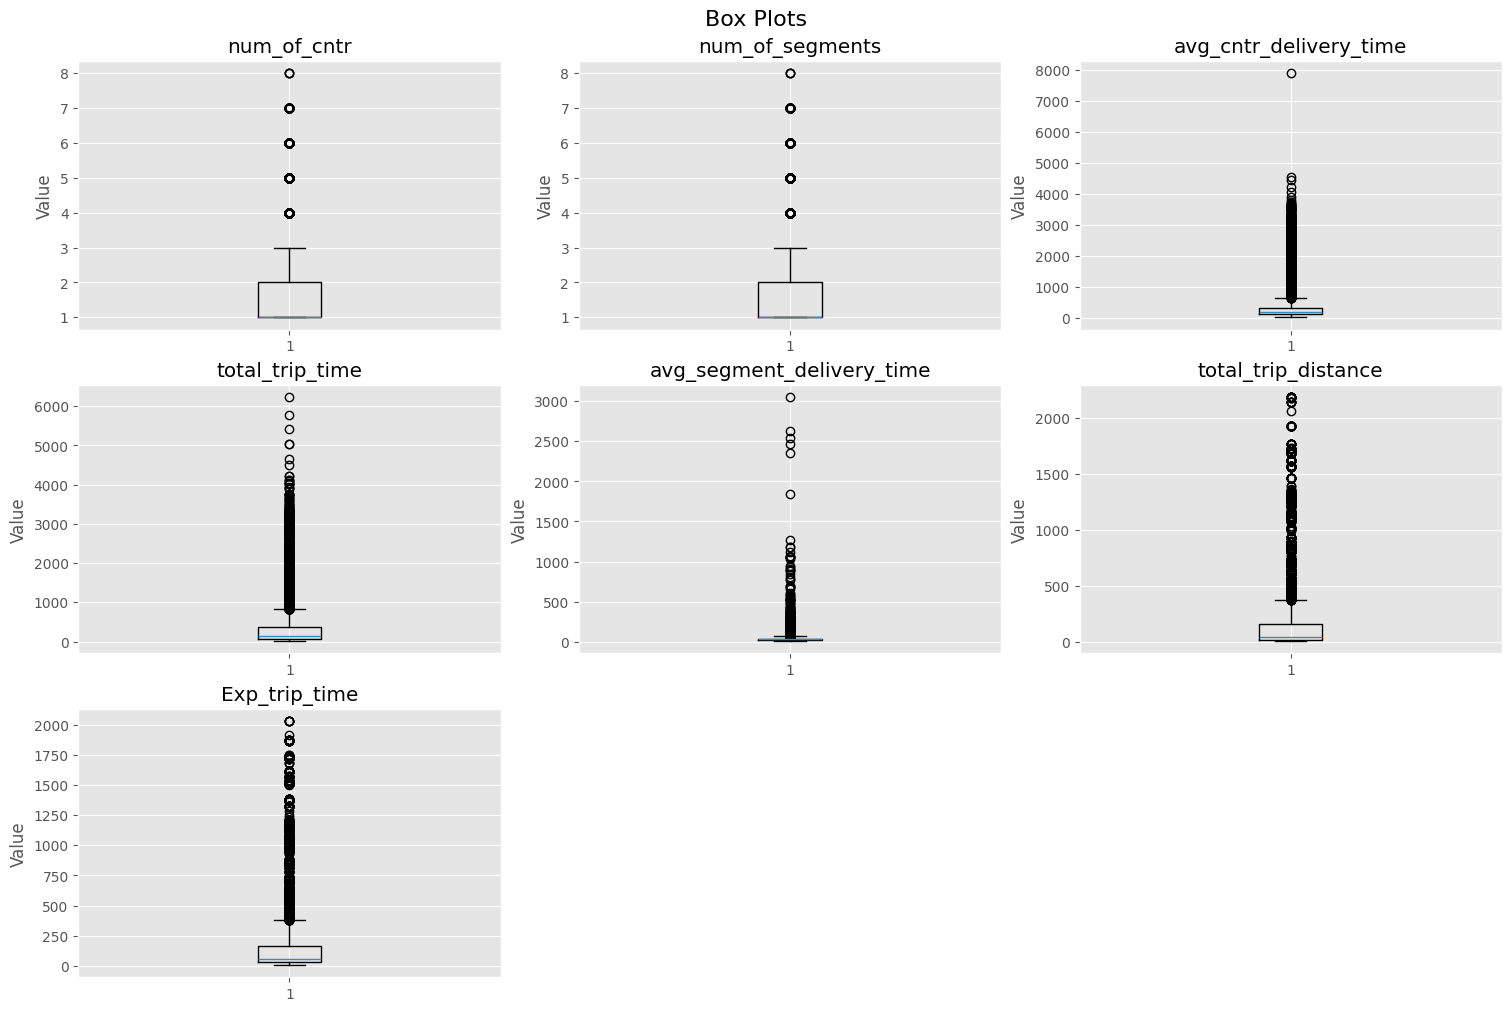

In [ ]:
num_columns = [
    'num_of_cntr',
    'num_of_segments',
    'avg_cntr_delivery_time',
    'total_trip_time',
    'avg_segment_delivery_time',
    'total_trip_distance',
    'Exp_trip_time'
]

# Create a grid of subplots
n_cols = int(len(num_columns)/2)
n_rows = (len(num_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create box plots in each subplot
for ax, column in zip(axes, num_columns):
    ax.boxplot(trip_df[column].dropna())
    ax.set_title(column)
    ax.set_ylabel('Value')

# Hide any empty subplots
for i in range(len(num_columns), len(axes)):
    fig.delaxes(axes[i])

# Show the plot
plt.suptitle('Box Plots', fontsize=16)
plt.show()

all the features has outliers

### Treating Outliers

In [ ]:
for column in num_columns:
    Q1 = trip_df[column].quantile(0.25)
    Q3 = trip_df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values using np.clip
    trip_df[column] = np.clip(trip_df[column], lower_bound, upper_bound)

trip_df.head()

,trip_uuid,data,trip_start_time,route_schedule_uuid,route_type,trip_scr_cntr,trip_scr_cntr_n,trip_dest_cntr,trip_dest_cntr_n,trip_first_cntr_start,trip_last_cntr_end,num_of_cntr,num_of_segments,avg_cntr_delivery_time,total_trip_time,avg_segment_delivery_time,total_trip_distance,Exp_trip_time,segment_ontime_miss,segment_ontime_successed,segment_ondist_miss,segment_ondist_successed,year,month,day_of_week,week_of_year,quarter,quarter-year,month-year,src_City,src_Place,src_Code,src_State,dest_City,dest_Place,dest_Code,dest_State,Corridor,City-Corridor,State-Corridor
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2.0,2.0,657.25,818.5,39.692308,376.144683,376.5,34,5,0,39,2018,9,2,37,3,Q3-2018,2018-09,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana,IND462022AAA-IND000000ACB,Bhopal-Gurgaon,Madhya Pradesh-Haryana
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,2.0,2.0,90.00,141.0,15.666667,73.186911,68.0,9,0,0,9,2018,9,2,37,3,Q3-2018,2018-09,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,IND572101AAA-IND562101AAA,Tumkur-Chikblapur,Karnataka-Karnataka
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,2.0,2.0,657.25,818.5,37.168539,376.144683,376.5,83,6,0,89,2018,9,2,37,3,Q3-2018,2018-09,Bengaluru,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab,IND562132AAA-IND160002AAC,Bangalore-Chandigarh,Karnataka-Punjab
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.0,1.0,100.00,59.0,29.500000,17.175274,15.0,2,0,0,2,2018,9,2,37,3,Q3-2018,2018-09,Mumbai,Hub,None,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,IND400072AAB-IND401104AAA,Mumbai-Mumbai,Maharashtra-Maharashtra
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,3.0,3.0,239.00,340.0,48.571429,127.448500,117.0,7,0,0,7,2018,9,2,37,3,Q3-2018,2018-09,Bellary,None,Dc,Karnataka,Bellary,None,Dc,Karnataka,IND583101AAA-IND583101AAA,Bellary-Bellary,Karnataka-Karnataka


# Analysis

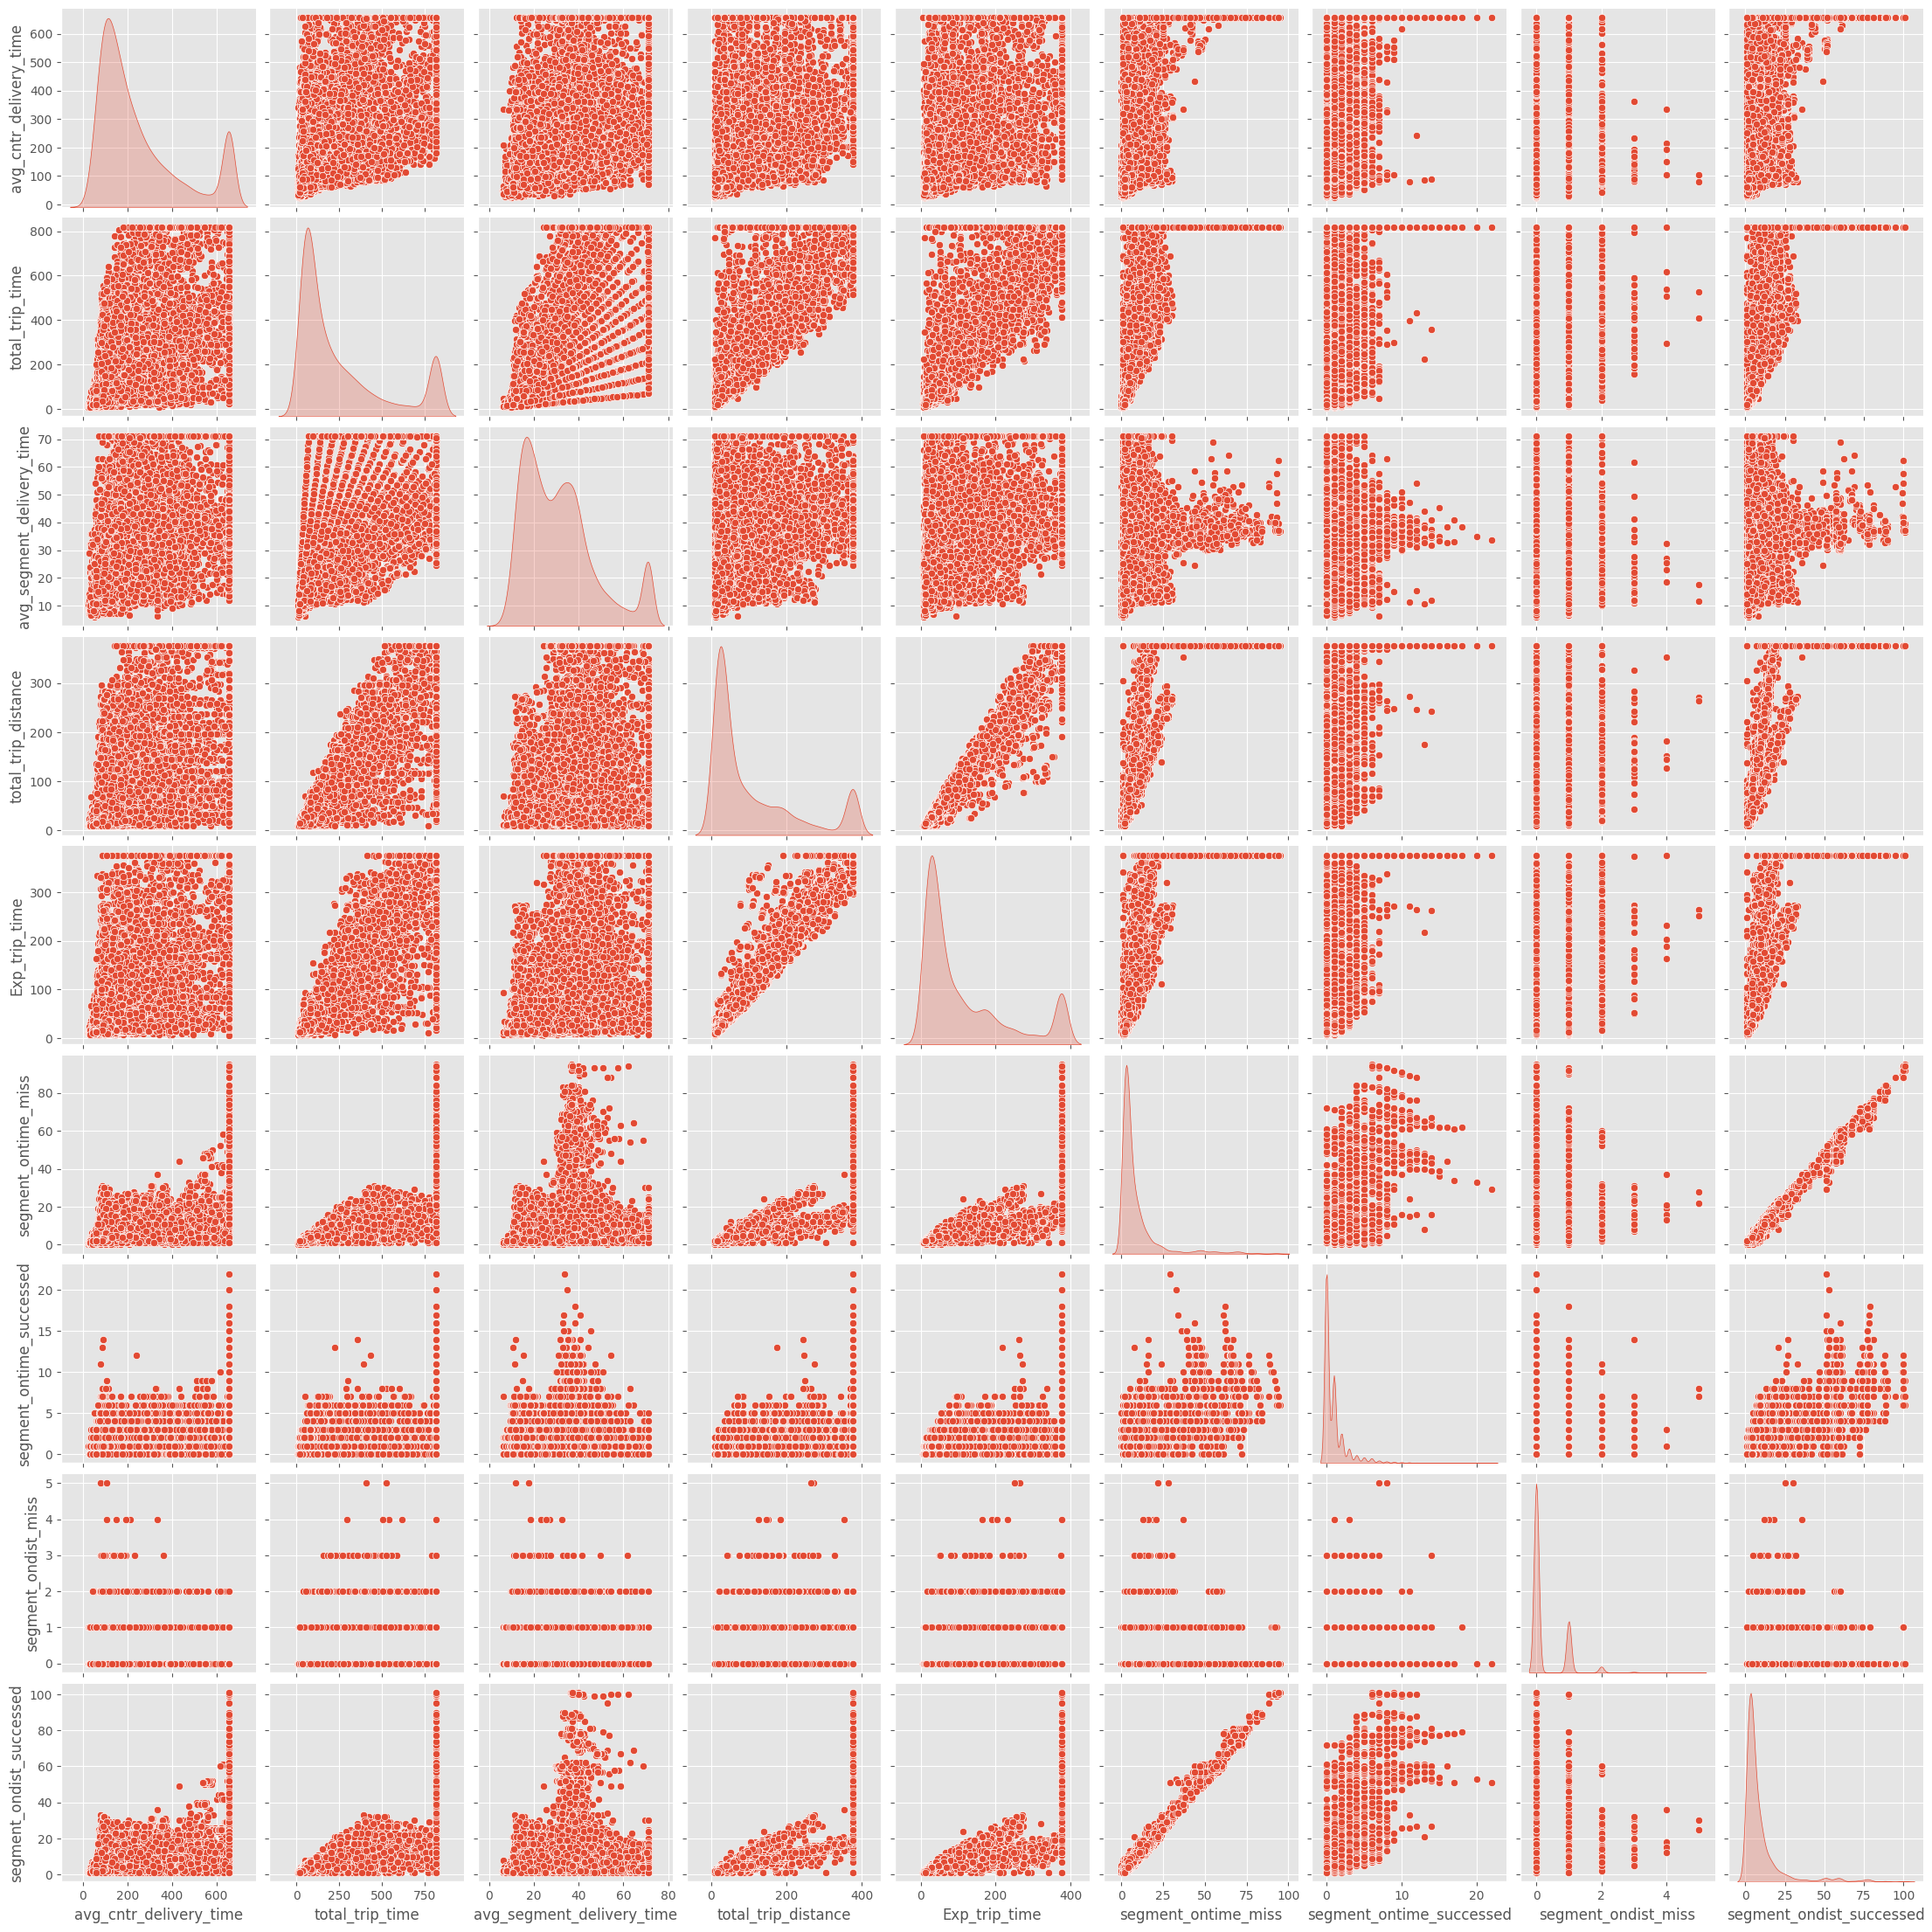

In [ ]:
# Pair Plot
numeric_columns = ['avg_cntr_delivery_time',
                   'total_trip_time', 'avg_segment_delivery_time',
                   'total_trip_distance', 'Exp_trip_time',
                   'segment_ontime_miss', 'segment_ontime_successed',
                   'segment_ondist_miss', 'segment_ondist_successed']

sns.pairplot(trip_df[numeric_columns], diag_kind='kde');

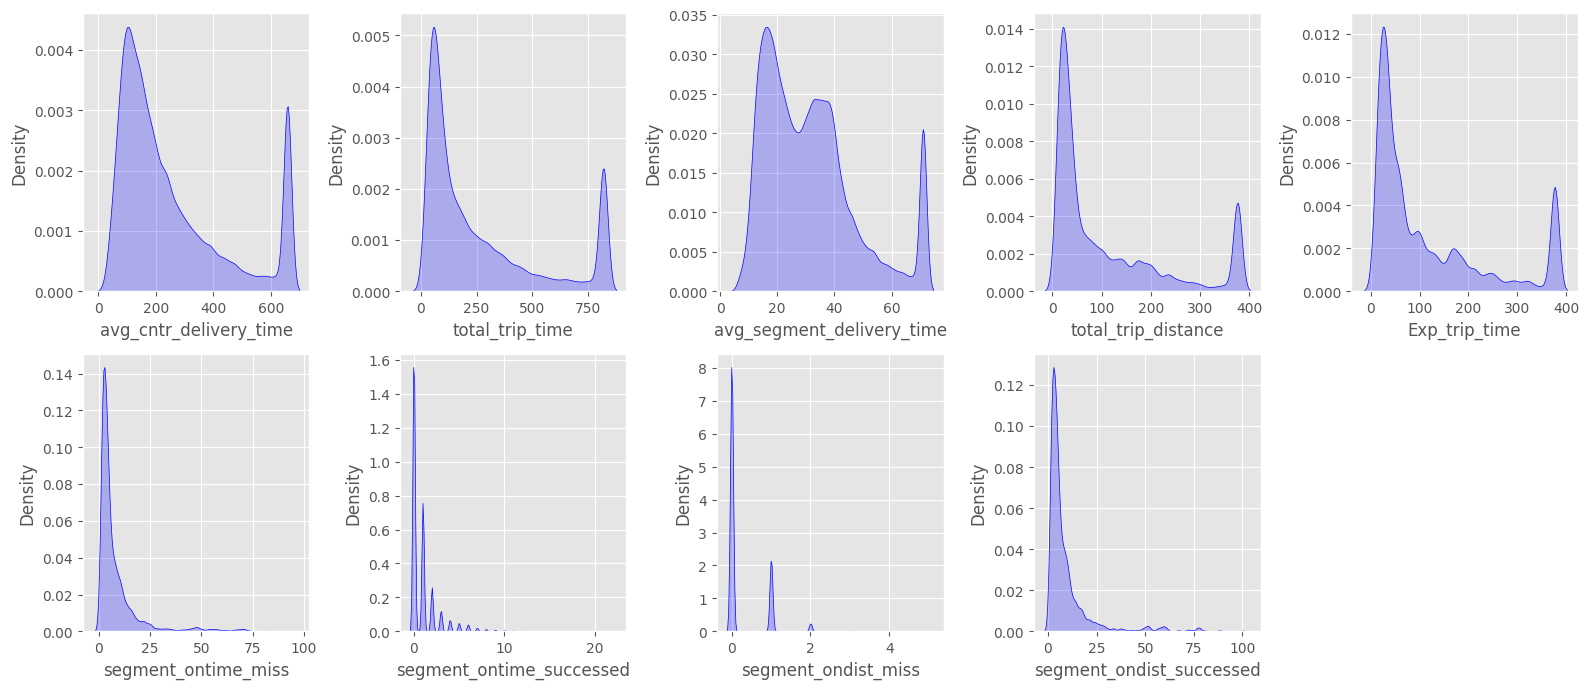

In [ ]:
# KDE PLots

num_cols = len(numeric_columns)
fig, axes = plt.subplots(nrows=2, ncols=(num_cols + 1) // 2, figsize=(16, 7))
axes = axes.flatten()

# Plot each column on a separate subplot
for i, column in enumerate(numeric_columns):
    sns.kdeplot(trip_df[column], fill=True, color="blue", bw_adjust=0.5, ax=axes[i])
    # axes[i].set_title(f"KDE Plot for '{column}'")
    axes[i].set_xlabel(column)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- We can observe a **bimodal distribution** in our trip metrics, such as time and distance. This means that some trips are significantly longer and cover more distance than others!
- Our "ontime" and "ondist" metrics are **left skewed**. Interestingly, both the `segment_<>_miss` and `segment_<>_successed` metrics also show a left skew, indicating a similar number of missed and successful segments!

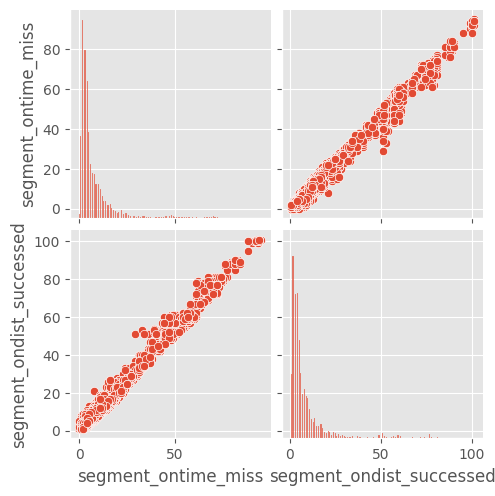

In [ ]:
sns.pairplot(trip_df[['segment_ontime_miss', 'segment_ondist_successed']]);

The `segment_ontime_miss` and `segment_ondist_successed` metrics reveal a linear trend, suggesting a trade-off between on-time delivery and shorter distances. This might indicate that taking longer routes could lead to less traffic and better on-time performance!

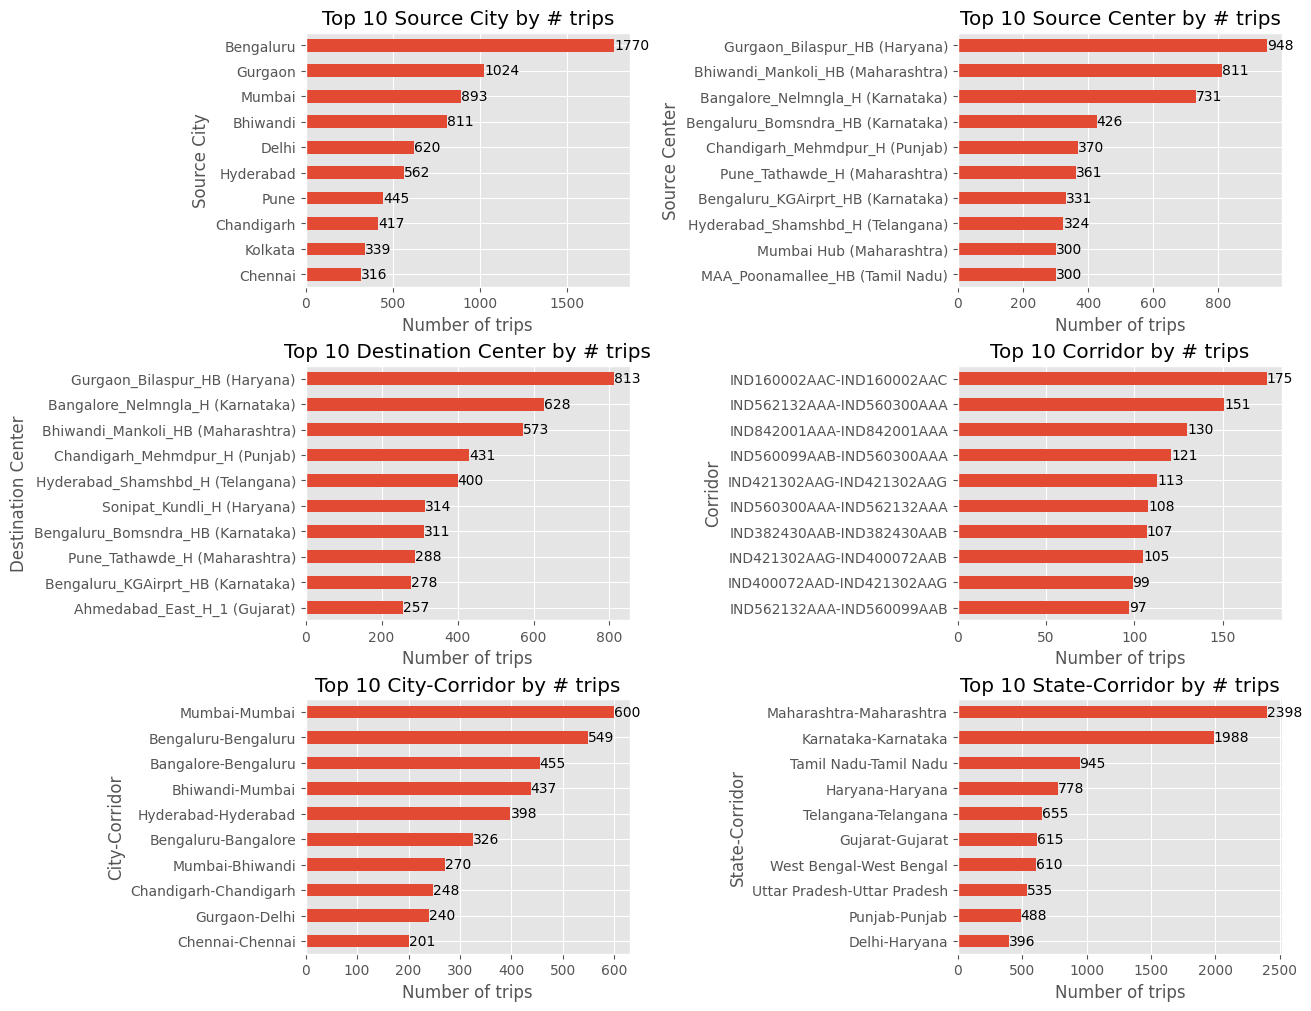

In [ ]:
def plot_top_n(ax, group, agg_name, label):
    group.plot(kind='barh', y=agg_name, legend=False, ax=ax)
    for index, value in enumerate(group[agg_name]):
        ax.text(value, index, str(value), va='center')  # position text at end of bar
    ax.set_xlabel(f"Number of {agg_name}")
    ax.set_ylabel(label)
    ax.set_title(f"Top 10 {label} by # {agg_name}")

# Top N
top_cities = trip_df.groupby('src_City').agg(trips=('trip_uuid', 'count')).sort_values('trips', ascending=False).iloc[:10]
top_cities = top_cities.sort_values('trips')  # Sort for better visual alignment in bar chart
top_10_cities = top_cities.index

top_sources = trip_df.groupby('trip_scr_cntr_n').agg(trips=('trip_uuid', 'count')).sort_values('trips', ascending=False).iloc[:10]
top_sources = top_sources.sort_values('trips')
top_10_sources = top_sources.index

top_dest = trip_df.groupby('trip_dest_cntr_n').agg(trips=('trip_uuid', 'count')).sort_values('trips', ascending=False).iloc[:10]
top_dest = top_dest.sort_values('trips')
top_10_dest = top_dest.index

top_corridor = trip_df.groupby('Corridor').agg(trips=('trip_uuid', 'count')).sort_values('trips', ascending=False).iloc[:10]
top_corridor = top_corridor.sort_values('trips')
top_10_corridor = top_corridor.index

top_City_corridor = trip_df.groupby('City-Corridor').agg(trips=('trip_uuid', 'count')).sort_values('trips', ascending=False).iloc[:10]
top_City_corridor = top_City_corridor.sort_values('trips')
top_10_City_corridor = top_City_corridor.index

top_State_corridor = trip_df.groupby('State-Corridor').agg(trips=('trip_uuid', 'count')).sort_values('trips', ascending=False).iloc[:10]
top_State_corridor = top_State_corridor.sort_values('trips')
top_10_State_corridor = top_State_corridor.index

# Plot as subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13, 10), constrained_layout=True)

plot_top_n(axes[0, 0], top_cities, 'trips', 'Source City')
plot_top_n(axes[0, 1], top_sources, 'trips', 'Source Center')
plot_top_n(axes[1, 0], top_dest, 'trips', 'Destination Center')
plot_top_n(axes[1, 1], top_corridor, 'trips', 'Corridor')
plot_top_n(axes[2, 0], top_City_corridor, 'trips', 'City-Corridor')
plot_top_n(axes[2, 1], top_State_corridor, 'trips', 'State-Corridor')
# axes[2, 1].axis('off')

plt.show()

- **Bengaluru, Mumbai, Delhi and Bhiwandi are the major Hubs**
- **Most of our Deliveries are intra-city deliveries (close distance deliveries <150Km)**
- **We don't often do inter-state deliveries**

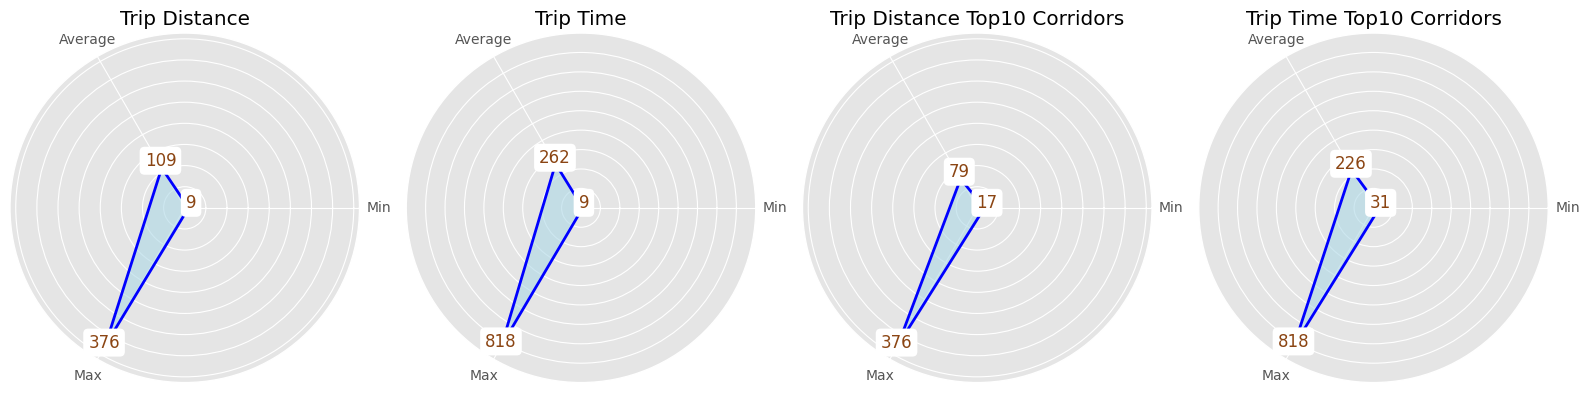

In [ ]:
def plot_radial_charts(data_list, titles):
    # Number of charts to plot
    n = len(data_list)

    # Create subplots for radial charts
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(4 * n, 5), subplot_kw=dict(polar=True))

    for i, (values, title) in enumerate(zip(data_list, titles)):
        # Prepare the data for plotting
        values += values[:1]  # Complete the loop
        theta = np.linspace(0, 2 * np.pi, len(values) - 1, endpoint=False).tolist()
        theta += theta[:1]  # Complete the loop

        # Plot the radial chart
        ax = axes[i]
        ax.fill(theta, values, color='lightblue', alpha=0.6)
        ax.plot(theta, values, color='blue', linewidth=2)

        # Set the labels
        categories = ['Min', 'Average', 'Max']
        ax.set_xticks(theta[:-1])
        ax.set_xticklabels(categories)

        # Add data labels with background
        padding = 6  # Define padding distance
        for j in range(len(values) - 1):
            label_x = theta[j]
            label_y = values[j] + padding

            # Add background for label
            ax.text(label_x, label_y, str(values[j]),
                    horizontalalignment='center',
                    color='#8B4513',
                    fontsize=12,
                    zorder=5,
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))  # Background color for labels

        # Set the radial limit
        ax.set_ylim(0, max(values) * 1.1)
        ax.set_yticklabels([])  # Hide radial circle labels
        ax.set_title(title)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Values
data_list = [
    [round(trip_df['total_trip_distance'].min()),
     round(trip_df['total_trip_distance'].mean()),
     round(trip_df['total_trip_distance'].max())],

    [round(trip_df['total_trip_time'].min()),
     round(trip_df['total_trip_time'].mean()),
     round(trip_df['total_trip_time'].max())],

    [round(trip_df[trip_df['Corridor'].isin(top_10_corridor)]['total_trip_distance'].min()),
     round(trip_df[trip_df['Corridor'].isin(top_10_corridor)]['total_trip_distance'].mean()),
     round(trip_df[trip_df['Corridor'].isin(top_10_corridor)]['total_trip_distance'].max())],

    [round(trip_df[trip_df['Corridor'].isin(top_10_corridor)]['total_trip_time'].min()),
     round(trip_df[trip_df['Corridor'].isin(top_10_corridor)]['total_trip_time'].mean()),
     round(trip_df[trip_df['Corridor'].isin(top_10_corridor)]['total_trip_time'].max())]
]

titles = ['Trip Distance', 'Trip Time', 'Trip Distance Top10 Corridors', 'Trip Time Top10 Corridors']

plot_radial_charts(data_list, titles)

- **Most of our trips are shorter (under 150Km)**
- **Most of our trips take around 4 Hours to complete**
- **For Top 10 Corridors avg time take is 3.7 Hours with an avg distance of 79Km**

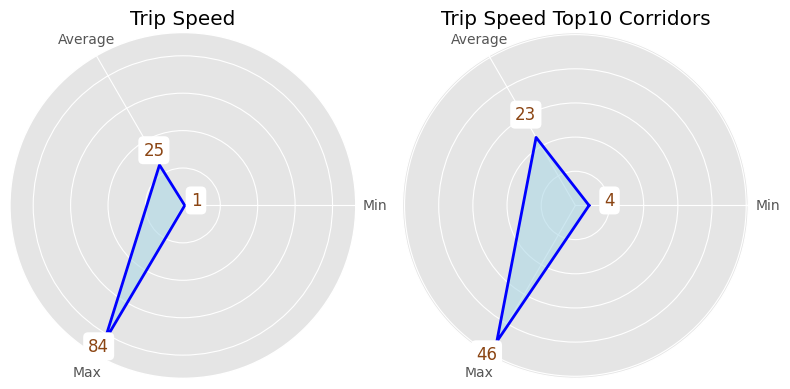

In [ ]:
# Speed Analysis
# imp columns
temp_df = trip_df[['trip_uuid', 'Corridor', 'total_trip_distance', 'total_trip_time']].copy()
temp_df['speed'] = temp_df['total_trip_distance'] / (temp_df['total_trip_time'] / 60)

# Values
data_list = [
    [round(temp_df['speed'].min()),
     round(temp_df['speed'].mean()),
     round(temp_df['speed'].max())],

    [round(temp_df[temp_df['Corridor'].isin(top_10_corridor)]['speed'].min()),
     round(temp_df[temp_df['Corridor'].isin(top_10_corridor)]['speed'].mean()),
     round(temp_df[temp_df['Corridor'].isin(top_10_corridor)]['speed'].max())],
]

titles = ['Trip Speed', 'Trip Speed Top10 Corridors']

plot_radial_charts(data_list, titles)

**We can see the speed for Top 10 Corridors are lesser compare to the overall speed of our trips, that's because Top 10 Corridors are intra-city deliveries where max speed we can achieve is 46Km/h with an avg speed of 23 km/h**

<Figure size 1200x600 with 0 Axes>

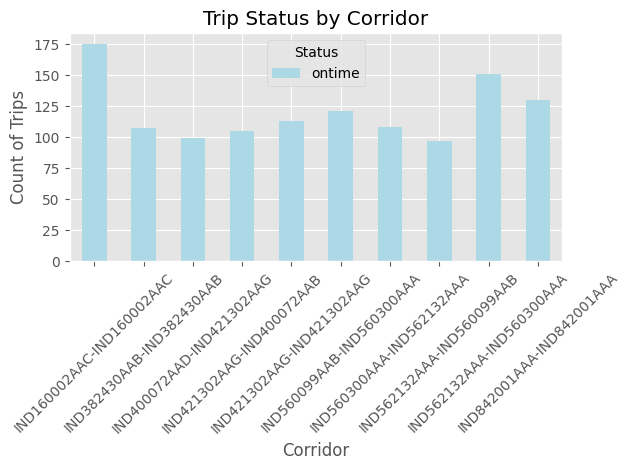

In [ ]:
plt.figure(figsize=(12, 6))

trip_df['status'] = trip_df.apply(lambda x: 'ontime' if (x['Exp_trip_time'] - x['total_trip_time']) < 0 else 'miss', axis=1)
status_counts = trip_df[trip_df['Corridor'].isin(top_10_corridor)].groupby(['Corridor', 'status']).size().unstack(fill_value=0)

# Plotting
status_counts.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'])
plt.title('Trip Status by Corridor')
plt.xlabel('Corridor')
plt.ylabel('Count of Trips')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

**Most of our deliveries are always ontime for top Corridor**

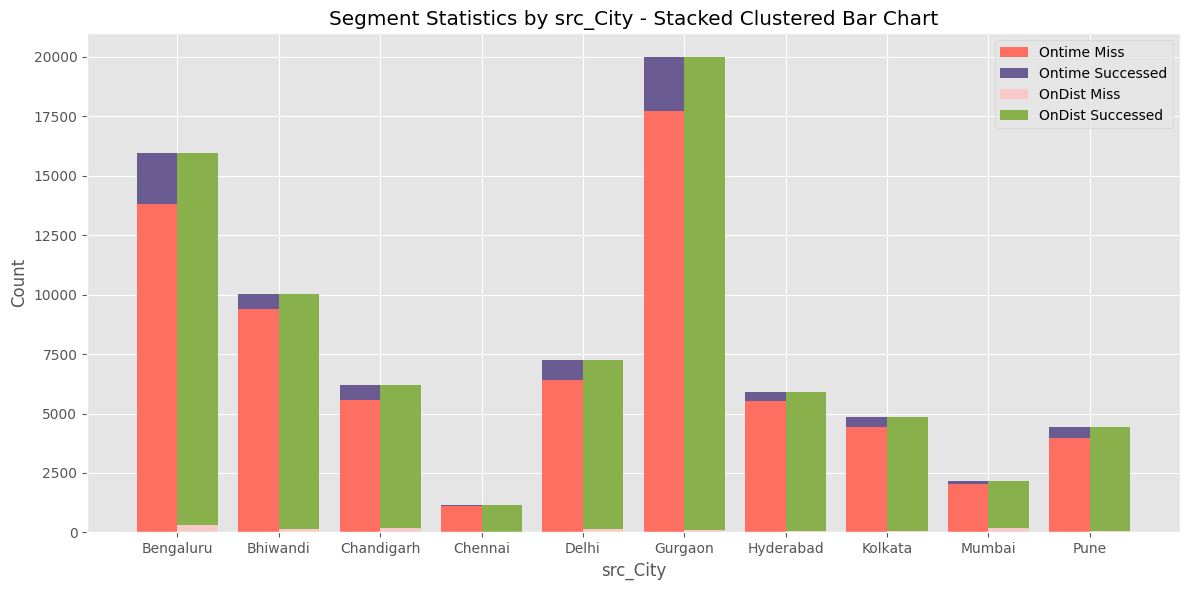

In [ ]:
# Stacked + Clustered Bar chart for each city

agg_data = trip_df[trip_df['src_City'].isin(top_10_cities)].groupby('src_City').agg({'segment_ontime_miss': 'sum', 'segment_ontime_successed': 'sum', 'segment_ondist_miss': 'sum', 'segment_ondist_successed': 'sum'}).reset_index()

# Set parameters for the bar plot
n_cities = len(agg_data)
bar_width = 0.4  # Width of each cluster
index = np.arange(n_cities)  # The x locations for the groups

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Choose a color palette
ontime_miss_color = '#FF6F61'  # Coral
ontime_successed_color = '#6B5B93'  # Slate Blue
ondist_miss_color = '#F7CAC9'  # Light Pink
ondist_successed_color = '#88B04B'  # Olive Green

# Plotting the bars for Ontime metrics (stacked)
plt.bar(index, agg_data['segment_ontime_miss'], bar_width,
        label='Ontime Miss', color=ontime_miss_color)
plt.bar(index, agg_data['segment_ontime_successed'], bar_width,
        bottom=agg_data['segment_ontime_miss'],
        label='Ontime Successed', color=ontime_successed_color)

# Plotting the bars for OnDist metrics (stacked)
plt.bar(index + bar_width, agg_data['segment_ondist_miss'], bar_width,
        label='OnDist Miss', color=ondist_miss_color)
plt.bar(index + bar_width, agg_data['segment_ondist_successed'], bar_width,
        bottom=agg_data['segment_ondist_miss'],
        label='OnDist Successed', color=ondist_successed_color)

# Adding labels and title
plt.xlabel('src_City')
plt.ylabel('Count')
plt.title('Segment Statistics by src_City - Stacked Clustered Bar Chart')
plt.xticks(index + bar_width / 2, agg_data['src_City'])  # Center x-ticks for groups
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

- Ontime Miss: How many times a segment missed it's expected delivery time (osrm)
- Ontime Successed: How many times a segment delivered on or before it's expected delivery time (osrm)
- OnDist Miss: How many times a segment delivery took a longer route than expected (osrm)
- OnDist Successed: How many times a segment delivery took shorter route than expected (osrm)

**Analysis: Mostly covering shorter distance but mostly take longer time**

# Feature Encoding

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   trip_uuid                  14817 non-null  object        
 1   data                       14817 non-null  object        
 2   trip_start_time            14817 non-null  datetime64[ns]
 3   route_schedule_uuid        14817 non-null  object        
 4   route_type                 14817 non-null  object        
 5   trip_scr_cntr              14817 non-null  object        
 6   trip_scr_cntr_n            14807 non-null  object        
 7   trip_dest_cntr             14817 non-null  object        
 8   trip_dest_cntr_n           14809 non-null  object        
 9   trip_first_cntr_start      14817 non-null  datetime64[ns]
 10  trip_last_cntr_end         14817 non-null  datetime64[ns]
 11  num_of_cntr                14817 non-null  float64       
 12  num_

In [ ]:
# Removing Unnessary Features
final_df = trip_df.drop(columns=['route_schedule_uuid', 'trip_start_time', 'trip_scr_cntr_n', 'trip_dest_cntr_n', 'trip_first_cntr_start', 'trip_last_cntr_end', 'quarter-year', 'month-year', 'Corridor', 'City-Corridor', 'State-Corridor'])
final_df.head()

,trip_uuid,data,route_type,trip_scr_cntr,trip_dest_cntr,num_of_cntr,num_of_segments,avg_cntr_delivery_time,total_trip_time,avg_segment_delivery_time,total_trip_distance,Exp_trip_time,segment_ontime_miss,segment_ontime_successed,segment_ondist_miss,segment_ondist_successed,year,month,day_of_week,week_of_year,quarter,src_City,src_Place,src_Code,src_State,dest_City,dest_Place,dest_Code,dest_State,status
0,trip-153671041653548748,training,FTL,IND462022AAA,IND000000ACB,2.0,2.0,657.25,818.5,39.692308,376.144683,376.5,34,5,0,39,2018,9,2,37,3,Bhopal,Trnsport,H,Madhya Pradesh,Gurgaon,Bilaspur,HB,Haryana,ontime
1,trip-153671042288605164,training,Carting,IND572101AAA,IND562101AAA,2.0,2.0,90.00,141.0,15.666667,73.186911,68.0,9,0,0,9,2018,9,2,37,3,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,ontime
2,trip-153671043369099517,training,FTL,IND562132AAA,IND160002AAC,2.0,2.0,657.25,818.5,37.168539,376.144683,376.5,83,6,0,89,2018,9,2,37,3,Bengaluru,Nelmngla,H,Karnataka,Chandigarh,Mehmdpur,H,Punjab,ontime
3,trip-153671046011330457,training,Carting,IND400072AAB,IND401104AAA,1.0,1.0,100.00,59.0,29.500000,17.175274,15.0,2,0,0,2,2018,9,2,37,3,Mumbai,Hub,None,Maharashtra,Mumbai,MiraRd,IP,Maharashtra,ontime
4,trip-153671052974046625,training,FTL,IND583101AAA,IND583101AAA,3.0,3.0,239.00,340.0,48.571429,127.448500,117.0,7,0,0,7,2018,9,2,37,3,Bellary,None,Dc,Karnataka,Bellary,None,Dc,Karnataka,ontime


In [ ]:
# checking unique values
final_df.select_dtypes(exclude='number').apply(pd.Series.nunique)

,0
trip_uuid,14817
data,2
route_type,2
trip_scr_cntr,868
trip_dest_cntr,956
src_City,650
src_Place,641
src_Code,23
src_State,29
dest_City,744


In [ ]:
from sklearn.preprocessing import LabelEncoder

one_hot_encoding_columns = ['data', 'route_type', 'status']
label_encoding_columns = ['trip_scr_cntr', 'trip_dest_cntr', 'src_City', 'src_Place', 'src_Code', 'src_State', 'dest_City', 'dest_Place', 'dest_Code', 'dest_State']

# One Hot Encoding
df_encoded = pd.get_dummies(final_df, columns=one_hot_encoding_columns, prefix=one_hot_encoding_columns)

# Label Encoding
label_encoder = LabelEncoder()
for column in label_encoding_columns:
    df_encoded[column + '_encoded'] = label_encoder.fit_transform(df_encoded[column])

# drop original columns
df_encoded.drop(columns=label_encoding_columns, inplace=True)

df_encoded.head()

,trip_uuid,num_of_cntr,num_of_segments,avg_cntr_delivery_time,total_trip_time,avg_segment_delivery_time,total_trip_distance,Exp_trip_time,segment_ontime_miss,segment_ontime_successed,segment_ondist_miss,segment_ondist_successed,year,month,day_of_week,week_of_year,quarter,data_test,data_training,route_type_Carting,route_type_FTL,status_miss,status_ontime,trip_scr_cntr_encoded,trip_dest_cntr_encoded,src_City_encoded,src_Place_encoded,src_Code_encoded,src_State_encoded,dest_City_encoded,dest_Place_encoded,dest_Code_encoded,dest_State_encoded
0,trip-153671041653548748,2.0,2.0,657.25,818.5,39.692308,376.144683,376.5,34,5,0,39,2018,9,2,37,3,False,True,False,True,False,True,410,5,103,587,7,16,265,88,11,11
1,trip-153671042288605164,2.0,2.0,90.00,141.0,15.666667,73.186911,68.0,9,0,0,9,2018,9,2,37,3,False,True,True,False,False,True,553,610,619,608,10,14,159,580,3,15
2,trip-153671043369099517,2.0,2.0,657.25,818.5,37.168539,376.144683,376.5,83,6,0,89,2018,9,2,37,3,False,True,False,True,False,True,545,98,81,383,7,14,151,374,10,24
3,trip-153671046011330457,1.0,1.0,100.00,59.0,29.500000,17.175274,15.0,2,0,0,2,2018,9,2,37,3,False,True,True,False,False,True,315,370,421,183,23,17,475,385,15,18
4,trip-153671052974046625,3.0,3.0,239.00,340.0,48.571429,127.448500,117.0,7,0,0,7,2018,9,2,37,3,False,True,False,True,False,True,576,653,79,641,6,14,87,723,7,15


# Feature Standardizing

In [ ]:
final_df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_of_cntr                14817 non-null  float64
 1   num_of_segments            14817 non-null  float64
 2   avg_cntr_delivery_time     14817 non-null  float64
 3   total_trip_time            14817 non-null  float64
 4   avg_segment_delivery_time  14817 non-null  float64
 5   total_trip_distance        14817 non-null  float64
 6   Exp_trip_time              14817 non-null  float64
 7   segment_ontime_miss        14817 non-null  int64  
 8   segment_ontime_successed   14817 non-null  int64  
 9   segment_ondist_miss        14817 non-null  int64  
 10  segment_ondist_successed   14817 non-null  int64  
 11  year                       14817 non-null  int32  
 12  month                      14817 non-null  int32  
 13  day_of_week                14817 non-null  int

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['num_of_cntr' ,'num_of_segments' ,'avg_cntr_delivery_time' ,'total_trip_time' ,'avg_segment_delivery_time' ,'total_trip_distance' ,'Exp_trip_time']

scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded[numeric_columns])
scaled_df = pd.DataFrame(scaled, columns=[f"{col}_scaled" for col in numeric_columns])

scaled_df = pd.concat([df_encoded, scaled_df], axis=1).drop(columns=numeric_columns)
scaled_df.head()

,trip_uuid,segment_ontime_miss,segment_ontime_successed,segment_ondist_miss,segment_ondist_successed,year,month,day_of_week,week_of_year,quarter,data_test,data_training,route_type_Carting,route_type_FTL,status_miss,status_ontime,trip_scr_cntr_encoded,trip_dest_cntr_encoded,src_City_encoded,src_Place_encoded,src_Code_encoded,src_State_encoded,dest_City_encoded,dest_Place_encoded,dest_Code_encoded,dest_State_encoded,num_of_cntr_scaled,num_of_segments_scaled,avg_cntr_delivery_time_scaled,total_trip_time_scaled,avg_segment_delivery_time_scaled,total_trip_distance_scaled,Exp_trip_time_scaled
0,trip-153671041653548748,34,5,0,39,2018,9,2,37,3,False,True,False,True,False,True,410,5,103,587,7,16,265,88,11,11,0.369287,0.369287,2.198381,2.149256,0.513655,2.282744,2.251239
1,trip-153671042288605164,9,0,0,9,2018,9,2,37,3,False,True,True,False,False,True,553,610,619,608,10,14,159,580,3,15,0.369287,0.369287,-0.875411,-0.465311,-0.978953,-0.304667,-0.402435
2,trip-153671043369099517,83,6,0,89,2018,9,2,37,3,False,True,False,True,False,True,545,98,81,383,7,14,151,374,10,24,0.369287,0.369287,2.198381,2.149256,0.356865,2.282744,2.251239
3,trip-153671046011330457,2,0,0,2,2018,9,2,37,3,False,True,True,False,False,True,315,370,421,183,23,17,475,385,15,18,-0.721894,-0.721894,-0.821223,-0.781760,-0.119548,-0.783035,-0.858333
4,trip-153671052974046625,7,0,0,7,2018,9,2,37,3,False,True,False,True,False,True,576,653,79,641,6,14,87,723,7,15,1.460468,1.460468,-0.068015,0.302658,1.065276,0.158754,0.019057


# Conclusion and Recommendation

### Key Findings:
- Bengaluru, Mumbai, Delhi, and Bhiwandi are major delivery hubs.
- Most deliveries are intra-city and short-distance (under 150km).
- Inter-state deliveries are infrequent.
- Trip times are around 4 hours on average.
- Top 10 corridors have slightly lower average speeds due to intra-city traffic.
- Most deliveries are on time for top corridors.
- A bimodal distribution is observed in trip metrics (time and distance).
- Ontime and OnDist metrics are left-skewed.

### Business Recommendations:
Based on the analysis of the trip data, here are some key findings and recommendations for the business:

1. Focus on Intra-city Deliveries:
   - The majority of trips are short, intra-city deliveries. Optimize operations for this segment.
   - Explore strategies to improve efficiency and reduce costs for these shorter trips.

2. Optimize Top 10 Corridors:
   - While most deliveries are on time for the top 10 corridors, the average speed is lower than overall average.
   - Analyze these corridors for bottlenecks and inefficiencies. Route optimization and better traffic management can improve speed.

3. Understand the Trade-off between On-time Delivery and Distance:
  - There is a correlation between on-time delivery and distance, potentially indicating longer routes may avoid traffic.
  - Evaluate whether slight route deviations can be beneficial for on-time delivery without incurring significant additional costs or time.

4. Analyze Speed Discrepancies:
   - Average speed is lower for the top 10 corridors compared to overall trips.
   - Investigate reasons for the lower speeds in high-volume areas. Consider factors like traffic, road conditions, and delivery schedules.

5. Monitor Segment Performance:
   - The data indicates a left skew in ontime and ondist metrics, with a notable number of missed segments.
   - Implement monitoring systems to identify and address potential problems.


6. Continuously Monitor Performance:
   - Regularly review key performance indicators (KPIs), such as on-time delivery rates, average trip times, and speed.
   - Use data-driven insights to make adjustments to operations and improve overall efficiency.

### In-depth Analysis :
- Optimize delivery routes for intra-city trips to improve speed and efficiency within top corridors.  Consider real-time traffic data integration.
- Investigate the reasons for longer trip times, even for short distances, and explore strategies for route optimization and traffic avoidance.  Examine the "bimodal distribution" to identify longer trips and see if they are due to specific factors that can be mitigated.
- Explore demand patterns and adjust resources (drivers, vehicles) dynamically based on the city and time of day, especially during peak hours in major cities.
- Analyze the correlation between on-time performance and distance, and adapt delivery strategies accordingly.  Focus on improving on-time delivery for longer routes or trips with unique constraints.
- Further investigate the "segment_ontime_miss" and "segment_ondist_successed" metrics' linear trend to understand its implications for resource allocation and operational efficiency.
- Monitor and analyze delivery performance for top corridors to maintain their high on-time delivery rate.  Early warning systems for potential delays or route disruptions can minimize negative impacts.
- Consider developing a predictive model for trip times, leveraging historical data, traffic patterns, and other relevant factors. This model can be used for proactive scheduling and improved customer communication.
- Segment customers based on their delivery needs and preferences (e.g. speed vs. cost). Implement targeted logistics strategies for different segments.




<!-- ![Alt Text](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExaXR0aWU3bWt3Y2Q4NHF0b2w1eWQ3Y2tvbTl3MGFranBjMGJjN3R1eiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/VzkCRACE2PRdoJRx9c/giphy.gif) -->

![Alt Text](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExcnpsemF6azhnNHFsajQwaDVycjBidGpmNDZ5aDZnZnh4eTVsczducSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/ne3qb8GHvteK4QGtbs/giphy.gif)